In [4]:
import numpy as np

In [8]:
x = np.array([[1.0,1.0], [2.0, -2.0],
             [-1.0,-1.5],[-2.0,-1.0],
             [-2.0,1.0], [1.5,-0.5]])
X = np.c_[np.ones(len(x)),x]
y = np.array([1,-1,-1,-1,1,1])
w = np.random.random((X.shape[1],1)) # random btw 0 and 1

In [10]:
print("x.shape:", x.shape)
print("X.shape:" , X.shape)

x.shape: (6, 2)
X.shape: (6, 3)


# Perceptron Algorithm
지금까지 설명한 퍼셉트론 알고리즘을 도식화하면 다음과 같이 요약할 수 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch4/PerceptronAlgorithm.PNG?raw=true" width="600">
<center>그림 1: 퍼셉트론 알고리즘</center>

In [11]:
eta = 0.1
for xi, yi in zip(X,y):
    xi = xi.reshape(w.shape) # converting xi column to row
    z = np.dot(w.T, xi)
    yhat = np.where(z > 0.0, 1, -1) 
    # stair function
    # if z > 0: yhat = 1
    # else : yhat = -1
    delta = eta*(yi-yhat)*xi # adjusting weights
    w += delta
print(np.round(w,2)) # weights in column vector

[[0.64]
 [0.07]
 [0.99]]


In [12]:
x = np.array([[1.0,1.0], [2.0, -2.0],
             [-1.0,-1.5],[-2.0,-1.0],
             [-2.0,1.0], [1.5,-0.5]])
X = np.c_[np.ones(len(x)),x] # samples
y = np.array([1,-1,-1,-1,1,1]) # class labels
w = np.array([0, 1.0, 0.5]).reshape(X.shape[1],1)
# w = np.random.random((X.shape[1],1)) # initial weight
maxlabel, minlabel = y.max(), y.min() 

epochs = 1 # number of times repeating learning
eta = 0.1
for _ in range(epochs):
    for xi, yi in zip(X,y):
        xi = xi.reshape(w.shape) # converting xi column to row
        z = np.dot(w.T, xi)
        yhat = np.where(z > 0.0,maxlabel, minlabel) 
        delta = eta*(yi-yhat)*xi # adjusting weights
        w += delta
print(np.round(w,2)) # weights in column vector
    


[[0.2]
 [0.5]
 [1. ]]


In [ ]:
# perceptron function
def perceptron(X,y, w = None, eta = 0.1, epochs = 5, random_seed=1):
    # if weight is given use it, otherwise create as random
    # this is for code debugging
    if w is None:
        np.random.seed(random_seed)
        w = np.random.random((X.shape[1],1))
    maxlabel, minlabel = y.max(), y.min()
    for _ in range(epochs):
        for xi, yi in zip(X,y):
            xi = xi.reshape(w.shape)
            z = np.dot(x.T, xi)
            z = np.dot(w.T, xi)
            yhat = np.where(z >=0.0, maxlabel, minlabel)
            delta = eta * (yi-yhat) * xi
            w += delta
    return w

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
% run code/plot_xyw.py

x = np.array([[1.0,1.0], [2.0, -2.0],
             [-1.0,-1.5],[-2.0,-1.0],
             [-2.0,1.0], [1.5,-0.5]])
X = np.c_[np.ones(len(x)),x] # samples
y = np.array([1,-1,-1,-1,1,1]) # class labels
w = np.array([0, 1.0, 0.5]).reshape(X.shape[1],1)
w = perceptron(X,y,w, eta=0.1, epochs=1)
plot_xyw(X,y,w, X0=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
% run code/plot_xyw.py

x = np.array([[1.0,1.0], [2.0, -2.0],
             [-1.0,-1.5],[-2.0,-1.0],
             [-2.0,1.0], [1.5,-0.5]])
X = np.c_[np.ones(len(x)),x] # samples
y = np.array([1,-1,-1,-1,1,1]) # class labels
w = np.array([0, 1.0, 0.5]).reshape(X.shape[1],1)
W = np.array([w])

epochs = 4
for _ in range(epochs):
    w = perceptorn(X,y,x,eta=0.05, epochs =1 )
plot_xyw(X,y,w, X0=True)

# Quiz

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%run code/plot_xyw.py

In [4]:
def perceptronV2(X,y, w=None, eta=0.1, epochs=10, random_seed=1):
  if w is None:
    randum = np.random.RandomState(random_seed)
    w = randum.normal(loc=0.0, scale=0.01, size = X.shape[1])
  maxy, miny = y.max(), y.min()
  for _ in np.arange(epochs):
    for xi, yi in zip(X, y):
      z = np.dot(xi, w)
      yhat = np.where(z > 0.0, maxy, miny)
      if yhat != yi:
        delta = eta*(yi-yhat)*xi
        w += delta
  return w

[0.2 0.5 1. ]


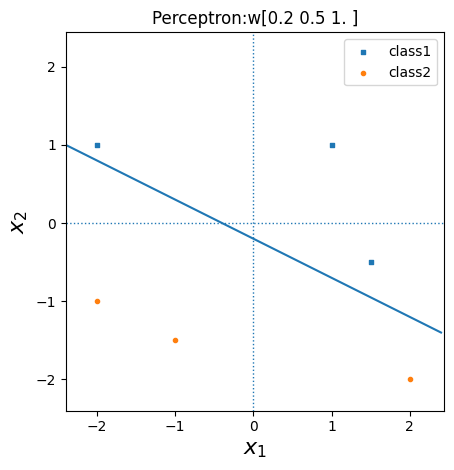

In [11]:
x = np.array([[1.0,1.0], [2.0,-2.0],[-1.0,-1.5],
              [-2.0,-1.0], [-2.0,1.0],[1.5,-0.5]])
X = np.c_[np.ones(len(x)),x]
y = np.array([1,-1,-1,-1,1,1])
w = np.array([0,1.0,0.5])
w = perceptronV2(X,y,w,eta=0.1, epochs=3)
print(w)
plot_xyw(X,y,w,X0=True)

In [12]:
print(x.shape)
print(X.shape)
print(y.shape)
print(w.shape)

(6, 2)
(6, 3)
(6,)
(3,)


[0.8 0.6 1.3]


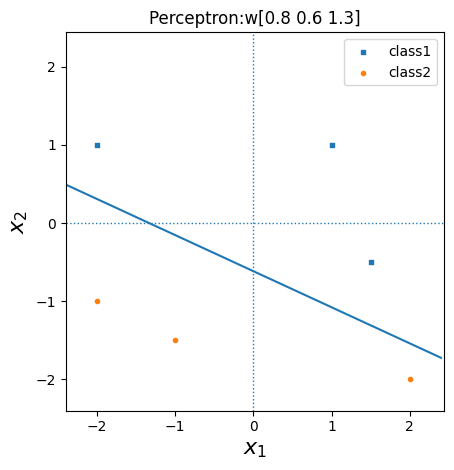

In [9]:
x = np.array([[1.0, 1.0], [2.0, -2.0],[-1.0, -1.5],
              [-2.0, -1.0], [-2.0, 1.0],[1.5, -0.5]])
X = np.c_[np.ones(len(x)),x]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0, 1.0, 0.5])
w = perceptronV2(X,y,w,eta=0.2)
print(w)
plot_xyw(X,y,w,X0=True)

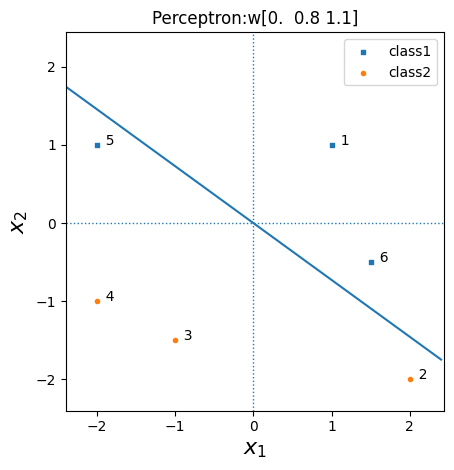

In [7]:
x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]])

X = np.c_[ np.ones(len(x)), x ]

y = np.array([1, -1, -1, -1, 1, 1])

w = np.array([0,0.8,1.1])

plot_xyw(X, y, w, X0=True, annotate=True)